In [1]:
import pandas as pd

# List of stock symbols
stocks = [
    "ACB", "BCM", "BID", "BVH", "CTG", "FPT", "GAS", "GVR", "HDB", "HPG", "MBB", "MSN", "MWG",
    "PLX", "POW", "SAB", "SHB", "SSB", "SSI", "STB", "TCB", "TPB", "VCB", "VHM", "VIB", "VIC",
    "VJC", "VNM", "VPB", "VRE"
]

# Initialize the clustering dictionary
clustering = {
    'Stock': [],
    'Average_Percentage_Increase': [],
    'Price_Std_dev': []
}
# Loop through each stock and process the data
for stock in stocks:
    file_path = f"D:\\Study Program\\Project\\Price\\{stock}_Price.csv"
    # Read the CSV file
    df = pd.read_csv(file_path)
    
    # Convert Date column to datetime   
    
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Sort by date
    df = df.sort_values(by='Date')
    
    # Extract year from Date
    df['Year'] = df['Date'].dt.year
    
    # Calculate yearly average closing prices
    yearly_avg = df.groupby('Year')['Close'].mean().reset_index()
    
    # Calculate yearly percentage increase in price
    yearly_avg['Price_Percentage_Increase'] = yearly_avg['Close'].pct_change() * 100
    
    # Calculate average percentage increase excluding NaN values
    if len(yearly_avg) > 1:
        average_percentage_increase = yearly_avg['Price_Percentage_Increase'].iloc[1:].mean()
    else:
        average_percentage_increase = 0
    
    # Calculate the standard deviation of the closing prices
    price_std_dev = df['Close'].std()
    
    # Append results to clustering dictionary
    clustering['Stock'].append(stock)
    clustering['Average_Percentage_Increase'].append(average_percentage_increase)
    clustering['Price_Std_dev'].append(price_std_dev)

# Convert clustering dictionary to DataFrame
clustering_df = pd.DataFrame(clustering)
clustering_df.to_csv("D:\\Study Program\\Project\\Clustering\\Clustering.csv", index= False)
# Print the DataFrame
print(clustering_df)


   Stock  Average_Percentage_Increase  Price_Std_dev
0    ACB                    12.128193    7121.870287
1    BCM                    24.355980   23054.388324
2    BID                    20.755156   12552.080303
3    BVH                     4.901714   16500.443990
4    CTG                    10.896918    8407.310791
5    FPT                    16.098812   28869.413387
6    GAS                     5.893347   21416.084279
7    GVR                    32.793338    9051.235474
8    HDB                    12.623016    4597.904993
9    HPG                    25.267487   10574.173694
10   MBB                    21.732648    7109.586327
11   MSN                     5.136642   23119.246655
12   MWG                    23.890529   18241.925213
13   PLX                    -6.597310   12663.590609
14   POW                    -1.945119    2153.831401
15   SAB                    -9.932948   57686.416854
16   SHB                    11.593360    4668.149527
17   SSB                    -3.662490    4048.

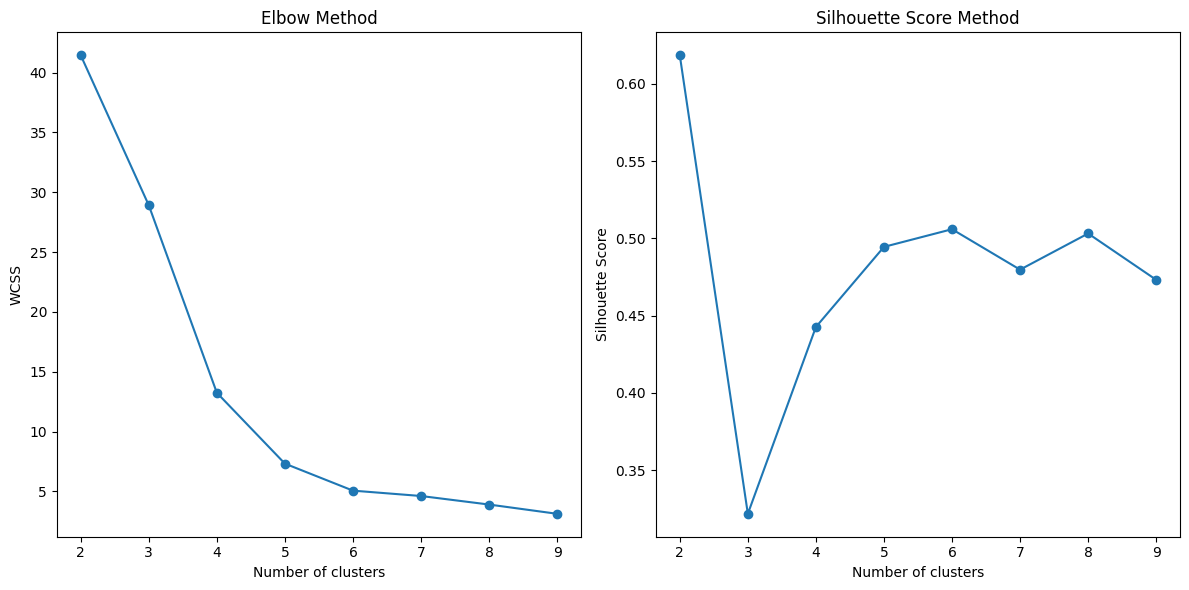

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import silhouette_score
# Create DataFrame
df = pd.read_csv("D:\\Study Program\\Project\\Clustering\\Clustering.csv")
df = pd.DataFrame(df)

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Average_Percentage_Increase', 'Price_Std_dev']])

# Determine the optimal number of clusters using the Elbow Method and Silhouette Score
wcss = []
silhouette_scores = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

# Plotting the Elbow Method and Silhouette Score
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(K_range, wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')

plt.tight_layout()
plt.show()



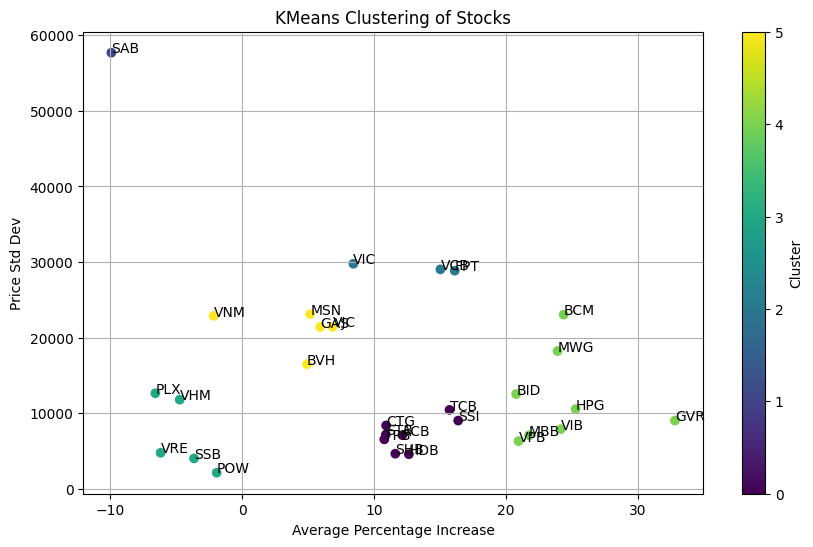

In [3]:
# Choosing the number of clusters (let's go with 3 as per the previous analysis)
optimal_k = 6
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
df['Cluster'] = kmeans.fit_predict(df_scaled)


# Plotting the final clusters with stock names
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Average_Percentage_Increase'], df['Price_Std_dev'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Average Percentage Increase')
plt.ylabel('Price Std Dev')
plt.title('KMeans Clustering of Stocks')
plt.colorbar(label='Cluster')

# Annotate each point with the stock name
for i, txt in enumerate(df['Stock']):
    plt.annotate(txt, (df['Average_Percentage_Increase'][i], df['Price_Std_dev'][i]))

plt.grid(True)
plt.show()

In [4]:
cluster =df[['Stock', 'Average_Percentage_Increase', 'Price_Std_dev', 'Cluster']]
cluster.to_csv("D:\\Study Program\\Project\\Clustering\\Clustering.csv", index = False)

In [5]:
cluster

,Stock,Average_Percentage_Increase,Price_Std_dev,Cluster
0,ACB,12.128193,7121.870287,0
1,BCM,24.355980,23054.388324,4
2,BID,20.755156,12552.080303,4
3,BVH,4.901714,16500.443990,5
4,CTG,10.896918,8407.310791,0
5,FPT,16.098812,28869.413387,2
6,GAS,5.893347,21416.084279,5
7,GVR,32.793338,9051.235474,4
8,HDB,12.623016,4597.904993,0
9,HPG,25.267487,10574.173694,4
